In [72]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
df = pd.read_csv("data_sets/merged_data.csv")
def preprocess(df):
    df2 = df.drop(columns=['Unnamed: 0.2', 'name', 'Unnamed: 0.3' ])
    df_cleaned_columns = df2.dropna()
    return df_cleaned_columns
df_cleaned = preprocess(df)
df_cleaned 

,local_date_time_full,lat,lon,apparent_t,delta_t,gust_kmh,gust_kt,air_temp,dewpt,press,press_qnh,press_msl,rel_hum,wind_dir,wind_spd_kmh,wind_spd_kt,BPM2.5
0,05-13-16,-37.8,145.0,16.85,2.75,8.5,4.5,16.70,11.70,1022.05,1022.05,1022.05,72.5,"['CALM', 'S']",2.0,1.0,18.818
1,05-13-15,-37.8,145.0,16.15,3.15,12.0,6.5,17.15,11.30,1021.85,1021.85,1021.85,68.5,"['SSW', 'SSW']",7.5,4.0,15.612
2,05-13-14,-37.8,145.0,17.10,3.30,9.0,5.0,17.70,11.65,1021.50,1021.50,1021.50,68.0,"['S', 'SSE']",6.0,3.0,17.918
3,05-13-13,-37.8,145.0,13.40,1.70,19.5,10.5,14.95,11.80,1021.80,1021.80,1021.80,81.5,"['SSW', 'SSW']",11.0,6.0,14.764
5,05-13-12,-37.8,145.0,15.30,3.10,18.5,10.0,16.70,10.95,1021.90,1021.90,1021.90,69.0,"['SSW', 'SSW']",9.0,5.0,15.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,05-18-20,-37.8,145.0,6.10,1.30,0.0,0.0,7.35,4.30,1029.95,1029.95,1029.95,81.0,"['CALM', 'CALM']",0.0,0.0,7.203
254,05-18-19,-37.8,145.0,6.90,1.75,0.0,0.0,8.20,4.20,1030.45,1030.45,1030.45,76.0,"['CALM', 'CALM']",0.0,0.0,10.182
255,05-18-18,-37.8,145.0,7.80,2.75,3.0,1.5,9.50,3.00,1030.40,1030.40,1030.40,64.0,"['SW', 'CALM']",1.0,0.5,4.192
256,05-18-17,-37.8,145.0,8.70,3.85,11.0,6.0,11.40,2.30,1030.55,1030.55,1030.55,53.5,"['SW', 'SSW']",5.5,3.0,8.354


##

In [75]:
df_cleaned.columns

Index(['local_date_time_full', 'lat', 'lon', 'apparent_t', 'delta_t',
       'gust_kmh', 'gust_kt', 'air_temp', 'dewpt', 'press', 'press_qnh',
       'press_msl', 'rel_hum', 'wind_dir', 'wind_spd_kmh', 'wind_spd_kt',
       'BPM2.5'],
      dtype='object')

In [76]:
# df_cleaned.set_index('local_date_time_full', inplace=True)

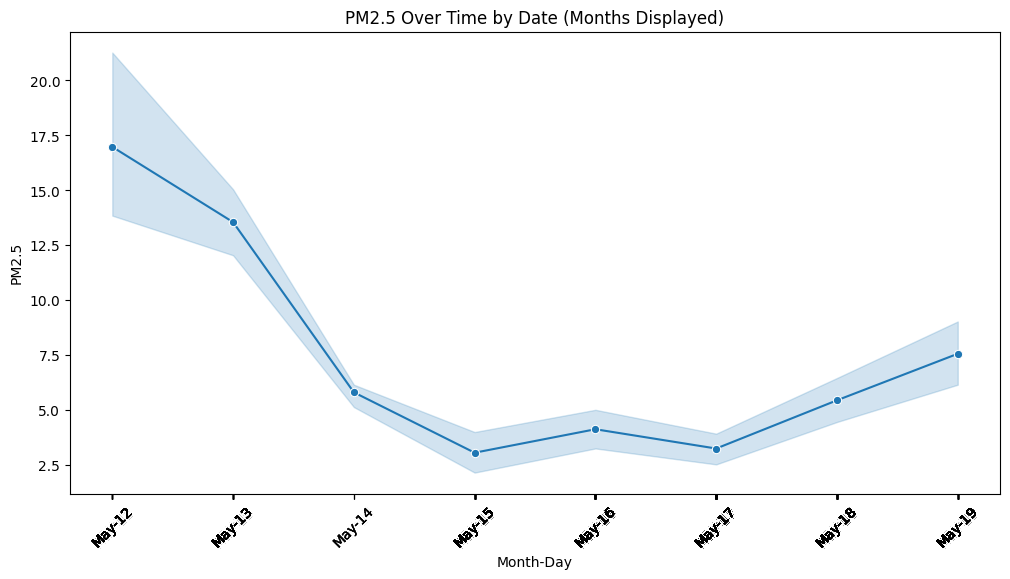

In [77]:
df_cleaned['local_date_time_full'] = pd.to_datetime(df_cleaned['local_date_time_full'], format='%m-%d-%H')

# 提取日期信息
df_cleaned['date'] = df_cleaned['local_date_time_full'].dt.date

# 提取月份信息，用于标注x轴
df_cleaned['month_day'] = df_cleaned['local_date_time_full'].dt.strftime('%b-%d')

# 绘制 PM2.5 的折线图，按日期分布，但x轴标签为月份
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='BPM2.5', data=df_cleaned, marker='o')

# 设置 x 轴标签为月份
plt.xticks(ticks=df_cleaned['date'], labels=df_cleaned['month_day'], rotation=45)

plt.title('PM2.5 Over Time by Date (Months Displayed)')
plt.xlabel('Month-Day')
plt.ylabel('PM2.5')
plt.show()

## Preliminary leanring 

In [78]:
# # 确保 'local_date_time_full' 是日期时间格式
# df_cleaned['local_date_time_full'] = pd.to_datetime(df_cleaned['local_date_time_full'])

# # 绘制 PM2.5 的折线图
# df_cleaned['date'] = df_cleaned['local_date_time_full'].dt.to_period('D').astype(str)

# # 绘制 PM2.5 的折线图，按日期分布
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='date', y='BPM2.5', data=df_cleaned, marker='o')
# plt.title('PM2.5 Over Time by Date')
# plt.xlabel('Date')
# plt.ylabel('PM2.5')
# plt.xticks(rotation=45)
# plt.show()

In [79]:
# plt.figure(figsize=(20, 20))
# for i, col in enumerate(df.columns):
#     if col != 'BPM2.5':
#         plt.subplot(4, 4, i + 1)
#         sns.scatterplot(x=df[col], y=df['BPM2.5'])
#         plt.title(f'Scatter Plot of {col} vs BPM2.5')

In [80]:
# # df['local_date_time_full'] = pd.to_datetime(df['local_date_time_full'], format='%m-%d-%y')

# # 设置时间列为索引


# # 绘制时间序列图
# plt.figure(figsize=(14, 7))
# plt.plot(df_cleaned.index, df_cleaned['BPM2.5'], marker='o')
# plt.title('Time Series of BPM2.5')
# plt.xlabel('Date Time')
# plt.ylabel('BPM2.5')
# plt.grid(True)
# plt.show()



In [81]:
# 去除列名中的前后空格
df_cleaned.columns = df_cleaned.columns.str.strip()

# 再次打印列名，确认是否成功去除空格
print(df_cleaned.columns.tolist())

# 尝试删除 'wind_dir' 列
df_cleaned = df_cleaned.drop(columns=['wind_dir'])

['local_date_time_full', 'lat', 'lon', 'apparent_t', 'delta_t', 'gust_kmh', 'gust_kt', 'air_temp', 'dewpt', 'press', 'press_qnh', 'press_msl', 'rel_hum', 'wind_dir', 'wind_spd_kmh', 'wind_spd_kt', 'BPM2.5', 'date', 'month_day']


In [82]:
columns_to_keep = ['apparent_t', 'delta_t', 'gust_kmh', 'gust_kt', 'air_temp', 'dewpt', 'press', 'press_qnh', 'press_msl', 'rel_hum', 'wind_spd_kmh', 'wind_spd_kt', 'BPM2.5']

# 过滤掉不需要的列
filtered_df = df[columns_to_keep]

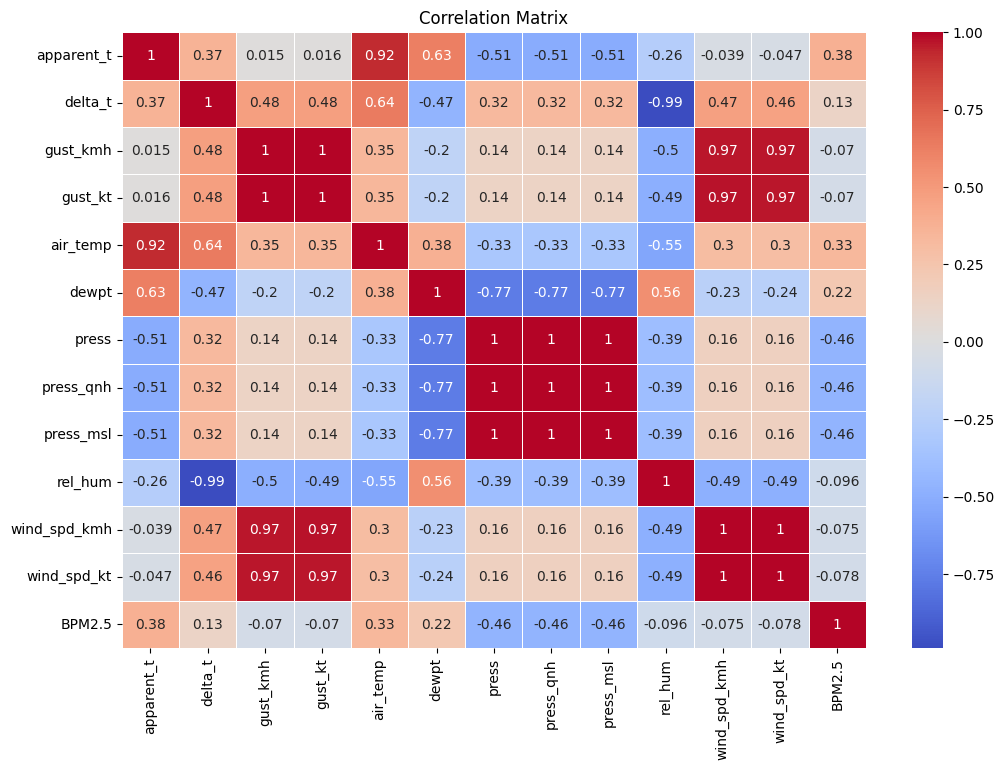

In [83]:
# 绘制相关矩阵图

plt.figure(figsize=(12, 8))
corr_matrix = filtered_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# # 绘制散点图矩阵
# sns.pairplot(filtered_df)
# plt.suptitle('Pairplot of All Features', y=1.02)
# plt.show()

## Build up model

In [85]:
df_cleaned

,local_date_time_full,lat,lon,apparent_t,delta_t,gust_kmh,gust_kt,air_temp,dewpt,press,press_qnh,press_msl,rel_hum,wind_spd_kmh,wind_spd_kt,BPM2.5,date,month_day
0,1900-05-13 16:00:00,-37.8,145.0,16.85,2.75,8.5,4.5,16.70,11.70,1022.05,1022.05,1022.05,72.5,2.0,1.0,18.818,1900-05-13,May-13
1,1900-05-13 15:00:00,-37.8,145.0,16.15,3.15,12.0,6.5,17.15,11.30,1021.85,1021.85,1021.85,68.5,7.5,4.0,15.612,1900-05-13,May-13
2,1900-05-13 14:00:00,-37.8,145.0,17.10,3.30,9.0,5.0,17.70,11.65,1021.50,1021.50,1021.50,68.0,6.0,3.0,17.918,1900-05-13,May-13
3,1900-05-13 13:00:00,-37.8,145.0,13.40,1.70,19.5,10.5,14.95,11.80,1021.80,1021.80,1021.80,81.5,11.0,6.0,14.764,1900-05-13,May-13
5,1900-05-13 12:00:00,-37.8,145.0,15.30,3.10,18.5,10.0,16.70,10.95,1021.90,1021.90,1021.90,69.0,9.0,5.0,15.707,1900-05-13,May-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1900-05-18 20:00:00,-37.8,145.0,6.10,1.30,0.0,0.0,7.35,4.30,1029.95,1029.95,1029.95,81.0,0.0,0.0,7.203,1900-05-18,May-18
254,1900-05-18 19:00:00,-37.8,145.0,6.90,1.75,0.0,0.0,8.20,4.20,1030.45,1030.45,1030.45,76.0,0.0,0.0,10.182,1900-05-18,May-18
255,1900-05-18 18:00:00,-37.8,145.0,7.80,2.75,3.0,1.5,9.50,3.00,1030.40,1030.40,1030.40,64.0,1.0,0.5,4.192,1900-05-18,May-18
256,1900-05-18 17:00:00,-37.8,145.0,8.70,3.85,11.0,6.0,11.40,2.30,1030.55,1030.55,1030.55,53.5,5.5,3.0,8.354,1900-05-18,May-18


In [84]:
X = df_cleaned.drop(columns=['BPM2.5', 'local_date_time_full', 'date', 'month_day'])  # 特征变量
y = df_cleaned['BPM2.5']  # 目标变量


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

TypeError: float() argument must be a string or a number, not 'datetime.date'